In [1]:
import matplotlib.pyplot as plt
import json

In [18]:
filename = '' # Enter name of output data file here!!!
filepath = 'results/' + filename + '.json'

results = None
with open(filepath, 'r') as infile:
    results = json.load(infile)

In [11]:
overview = {}
overview['simple'] = {'random': [],
                     'selective': [],
                     'selective_similar': []}
overview['complex'] = {'random': [],
                     'selective': [],
                      'selective_similar': []}

for result in results:
    
    rand_acc = []
    slct_acc = []
    slct_sim_acc = []
    
    for fold in result['results']['random']['histories']:
        rand_acc.append(fold['st_acc'][-2])
    for fold in result['results']['selective']['histories']:
        slct_acc.append(fold['st_acc'][-2])
    for fold in result['results']['selective_similar']['histories']:
        slct_sim_acc.append(fold['st_acc'][-2])
            
    if result['model'] == 0:
        overview['simple']['random'].append(sum(rand_acc) / len(rand_acc))
        overview['simple']['selective'].append(sum(slct_acc) / len(slct_acc))
        overview['simple']['selective_similar'].append(sum(slct_acc) / len(slct_acc))
    if result['model'] == 1:
        overview['complex']['random'].append(sum(rand_acc) / len(rand_acc))
        overview['complex']['selective'].append(sum(slct_acc) / len(slct_acc))
        overview['complex']['selective_similar'].append(sum(slct_sim_acc_acc) / len(slct_sim_acc_acc))


# Simple model

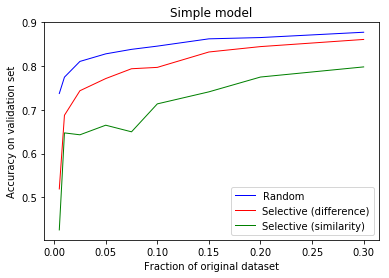

In [37]:
x = [0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3]
plt.plot(x, overview['simple']['random'], color='blue', linewidth = 1, label='Random')
plt.plot(x, overview['simple']['selective'], color='red', linewidth = 1, label='Selective (difference)')
plt.plot(x, overview['simple']['selective_similar'], color='green', linewidth = 1, label='Selective (similarity)')
plt.ylabel('Accuracy on validation set')
plt.xlabel('Fraction of original dataset')
plt.legend(loc='best')
plt.title('Simple model')
plt.savefig('results_simple.png', format='png', dpi=1000)
plt.show()


# Complex model

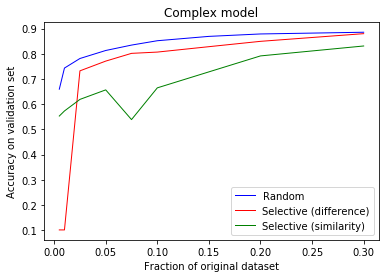

In [38]:
x = [0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3]
plt.plot(x, overview['complex']['random'], color='blue', linewidth = 1, label='Random')
plt.plot(x, overview['complex']['selective'], color='red', linewidth = 1, label='Selective (difference)')
plt.plot(x, overview['complex']['selective_similar'], color='green', linewidth = 1, label='Selective (similarity)')
plt.ylabel('Accuracy on validation set')
plt.xlabel('Fraction of original dataset')
plt.legend(loc='best')
plt.title('Complex model')
plt.savefig('results_complex.png', format='png', dpi=1000)
plt.show()
